# RED WINE PROJECT

Introduction:
    
    1.Here our main objective is that we should find the qualities for very good wine,and we should prepare a suitable model for predicting the wine quality.

    
    

# Importing the dataset

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
df=pd.read_csv('Red Wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

Observations:
    
    1.There are 1599 rows and 12 columns.

In [7]:
pd.set_option('display.max_rows',None)

# Preparation of data

In [8]:
from heatmap import heatmap,corrplot

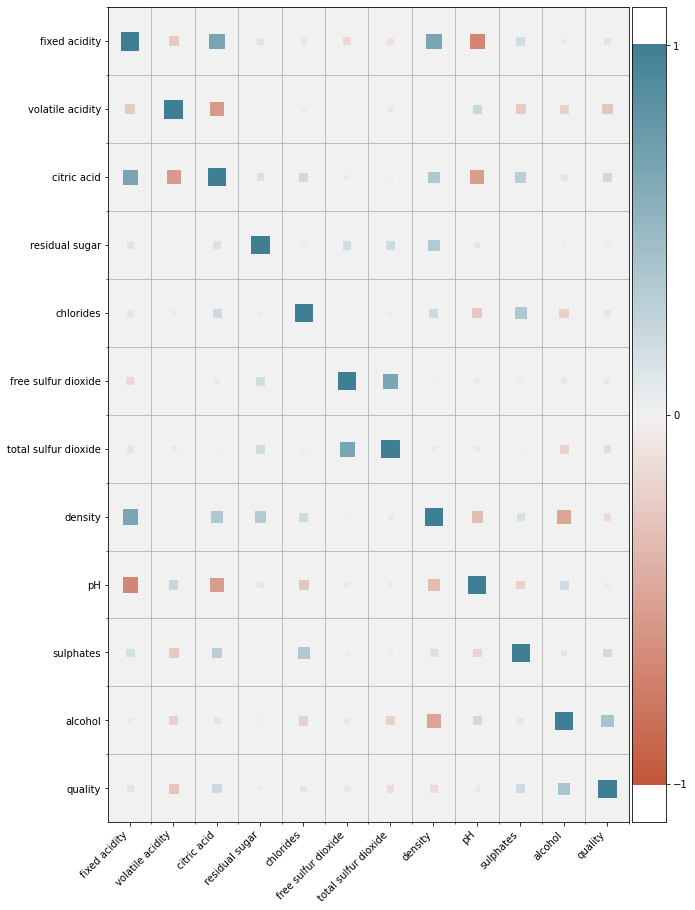

In [137]:
plt.figure(figsize=(10,15))
corrplot(df.corr(),size_scale=300)

Observations:
    
    1.Every column is correlated,no need to remove any data.
    

In [10]:
df['quality'].isnull().sum()

0

In [11]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Comment:
    
    1.As per the project discussion the quality value more than 7 will be good/1 and less than that will be not good/0.

In [12]:
df['quality'].replace([3,4,5,6],0,inplace=True)

In [13]:
df['quality'].replace([7,8],1,inplace=True)

In [14]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

Observations:
    
    1.There is a class imbalance problem, lets deal with it later.

# Getting basic outlook over the data

In [15]:
df.shape

(1599, 12)

In [16]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Observations:
    
    1.Only quality is int type of data, since its taget variable.

In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Observations:
    
    1.There are 12 columns.

In [18]:
df.head()

In [19]:
df.tail()

In [20]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   2
dtype: int64

In [21]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


Observations:
    
    1.The difference between the 75th percentile and maximum value got huge difference in all the cases so there is maximum chances of skewness.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observations:
    
    1.There are no null values.

# Carring Out the EDA to get the features of good wine

# Univariate Analysis

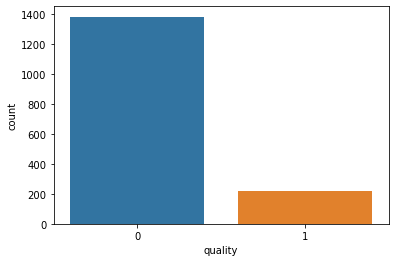

In [23]:
plt.figure()
sns.countplot(df['quality'])
plt.show()

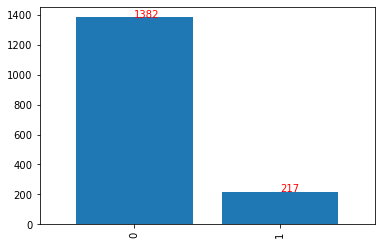

In [24]:
s = df['quality'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.quality + 0.2 , v.quality, color='red')


Observations:
    
    1.We can clearly see that there is a class imbalance.

fixed acidity


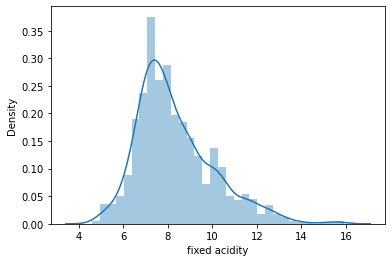

volatile acidity


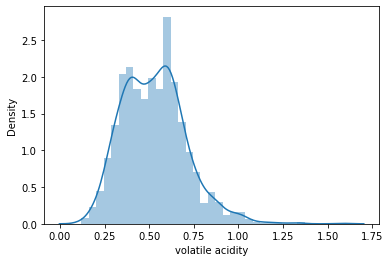

citric acid


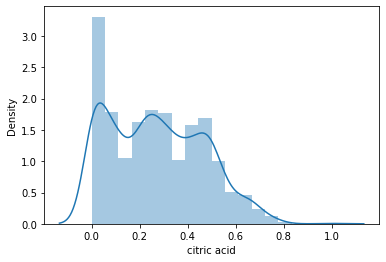

residual sugar


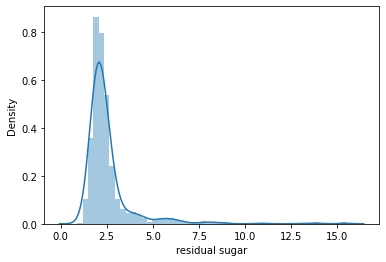

chlorides


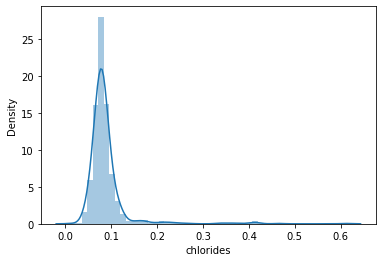

free sulfur dioxide


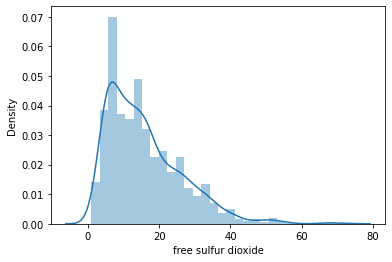

total sulfur dioxide


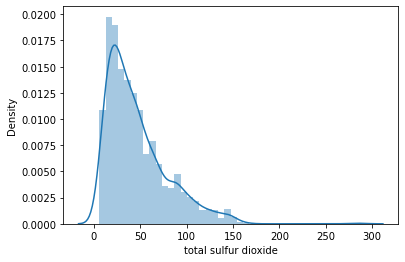

density


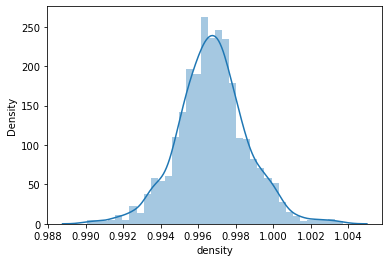

pH


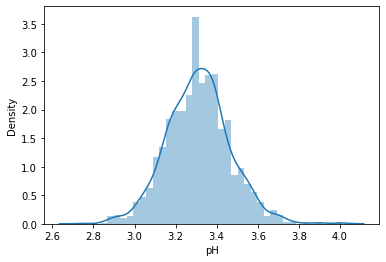

sulphates


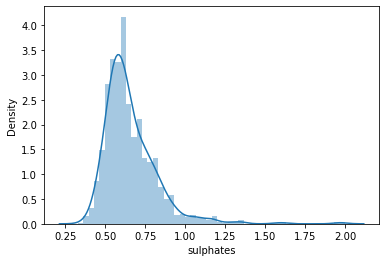

alcohol


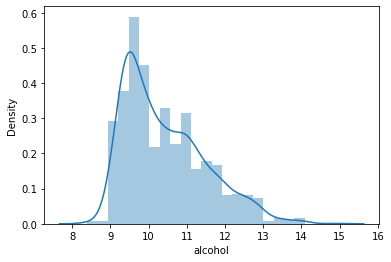

quality


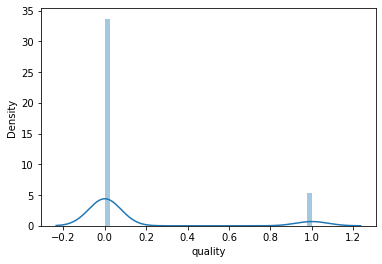

In [25]:
for col in df:
    print(col)
    plt.plot(figsize=(5,7))
    sns.distplot(df[col])
    plt.show()

Observations:
    
    1.There is enough amount of skewness in each column.

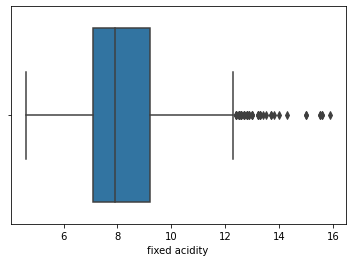

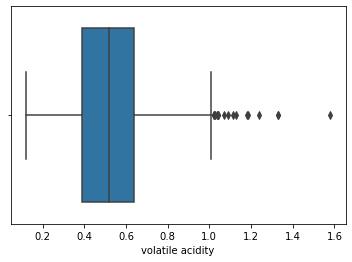

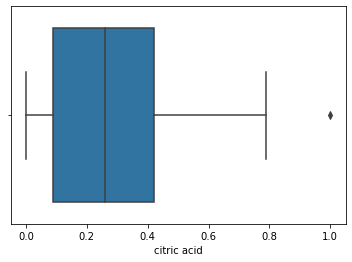

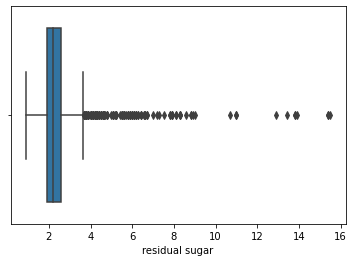

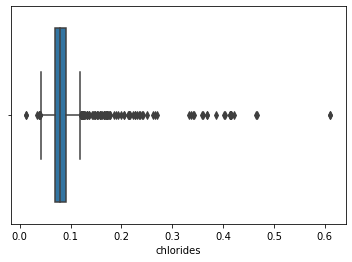

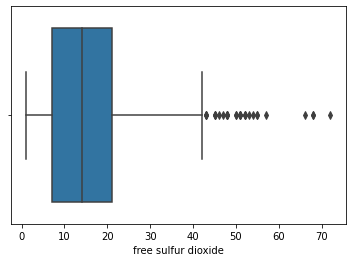

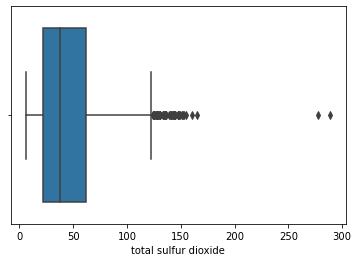

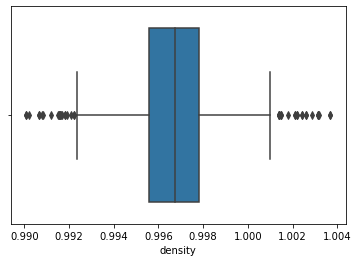

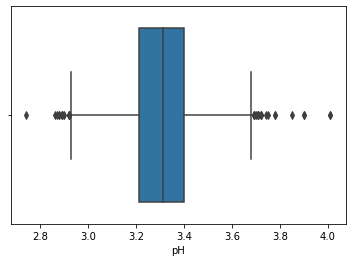

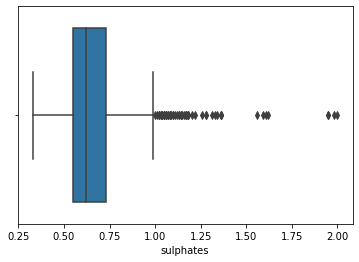

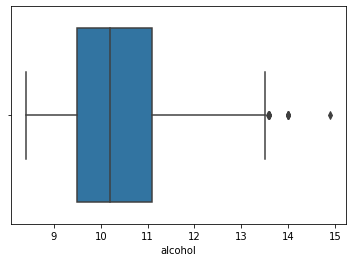

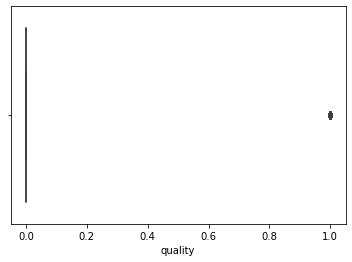

In [138]:
for col in df:
    plt.plot()
    sns.boxplot(df[col])
    plt.show()

Observations:
    
    1.There are outliers in significant numbers.

In [27]:
#lets take out the qualities of good wine.
q=df.groupby('quality')

In [28]:
g=q.get_group(1)
g.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,1
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,1
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5,1


In [29]:
g.count()

fixed acidity           217
volatile acidity        217
citric acid             217
residual sugar          217
chlorides               217
free sulfur dioxide     217
total sulfur dioxide    217
density                 217
pH                      217
sulphates               217
alcohol                 217
quality                 217
dtype: int64

In [30]:
#Lets take out 8 rated wine and comapre with that data

In [31]:
#examining the values to get 8 core in quality from original dataset as well as to get 7 to decide best values of each column for good quality wine.
dfz=pd.read_csv('Red Wine.csv')
q1=dfz.groupby('quality')  #an example of multivariate analysis
g1=q1.get_group(8)
g2=q1.get_group(7)

In [139]:
for col in g1:
    print(col)
    print(g1[col].describe())
    print('\n')

fixed acidity
count    18.000000
mean      8.566667
std       2.119656
min       5.000000
25%       7.250000
50%       8.250000
75%      10.225000
max      12.600000
Name: fixed acidity, dtype: float64


volatile acidity
count    18.000000
mean      0.423333
std       0.144914
min       0.260000
25%       0.335000
50%       0.370000
75%       0.472500
max       0.850000
Name: volatile acidity, dtype: float64


citric acid
count    18.000000
mean      0.391111
std       0.199526
min       0.030000
25%       0.302500
50%       0.420000
75%       0.530000
max       0.720000
Name: citric acid, dtype: float64


residual sugar
count    18.000000
mean      2.577778
std       1.295038
min       1.400000
25%       1.800000
50%       2.100000
75%       2.600000
max       6.400000
Name: residual sugar, dtype: float64


chlorides
count    18.000000
mean      0.068444
std       0.011678
min       0.044000
25%       0.062000
50%       0.070500
75%       0.075500
max       0.086000
Name: chlorides, d

Observations:
    
    Lest examine the features for 8 rated wines.
    1.The fixed acidity value should be in the range of 8.56 to 10.22
    2.volatile acidity value should be in the range of 0.42 to 0.85
    3.citric acid value should be in the range of 0.39 to 0.53
    4.residual sugar value should be in 2.57 to 2.6
    5.chlorides value should be in the range of 0.06 to 0.075
    6.free sulphur dioxide should be in the range of 13.27 to 16.5
    7.total sulphur dioxide should be in the range of 33.44 to 43
    8.density should be in the range of 0.995 to 0.998
    9.PH should be in the range of 3.26 to 3.72
    10.sulphates should be in range of 0.76 to 9.82
    11.alcohol should be in the range of 12.09 to 12.87

In [33]:
#lets compare g(which comprises of both score 7 and 8 both)

In [34]:
for col in g:
    print(col)
    print(g[col].describe())
    print('\n')

fixed acidity
count    217.000000
mean       8.847005
std        1.999977
min        4.900000
25%        7.400000
50%        8.700000
75%       10.100000
max       15.600000
Name: fixed acidity, dtype: float64


volatile acidity
count    217.000000
mean       0.405530
std        0.144963
min        0.120000
25%        0.300000
50%        0.370000
75%        0.490000
max        0.915000
Name: volatile acidity, dtype: float64


citric acid
count    217.000000
mean       0.376498
std        0.194438
min        0.000000
25%        0.300000
50%        0.400000
75%        0.490000
max        0.760000
Name: citric acid, dtype: float64


residual sugar
count    217.000000
mean       2.708756
std        1.363026
min        1.200000
25%        2.000000
50%        2.300000
75%        2.700000
max        8.900000
Name: residual sugar, dtype: float64


chlorides
count    217.000000
mean       0.075912
std        0.028480
min        0.012000
25%        0.062000
50%        0.073000
75%        0.08500

 Observations:
    
    1.The range of fixed acidity is between 8.84 to 10.1
    2.The range of volatile acidity is between 0.4 to 0.49
    3.The range of citric acid is between 0.37 to 0.49
    4.The range of residual sugar is between 2.7 to 2.3
    5.The range of chlorides is between 0.075 to 0.085
    6.The range of free sulphur dioxide 13.98 to 18
    7.The range of total sulfur dioxide 34.88 to 43
    8.The range of density is 0.99 to 1
    9.The range of PH is 3.2 to 3.38
    10.The range of sulphates is from 0.74 to 0.82
    11.The range of alcohol is from 11.51 to 12.2 
    

fixed acidity


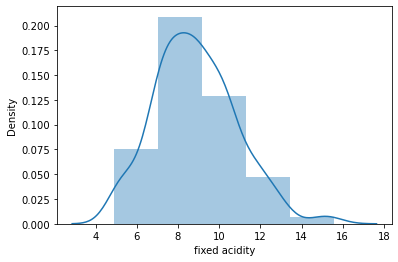



volatile acidity


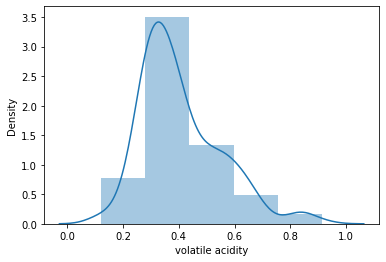



citric acid


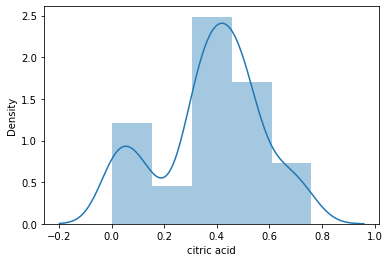



residual sugar


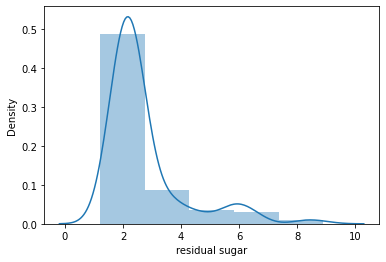



chlorides


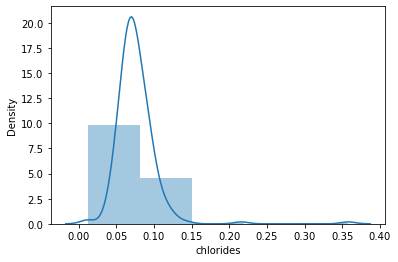



free sulfur dioxide


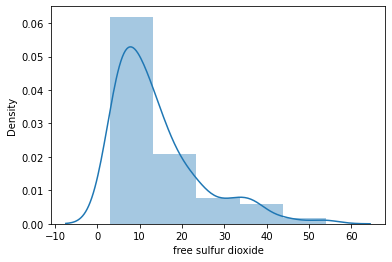



total sulfur dioxide


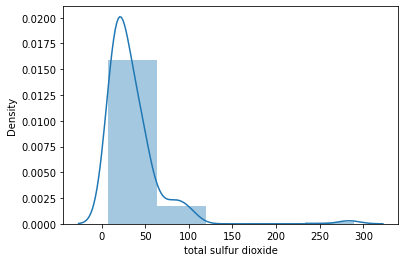



density


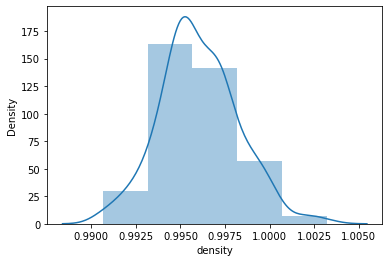



pH


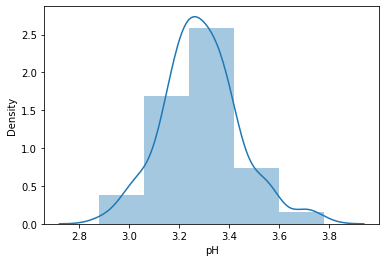



sulphates


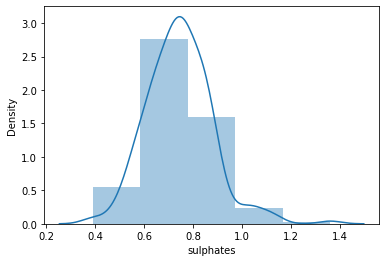



alcohol


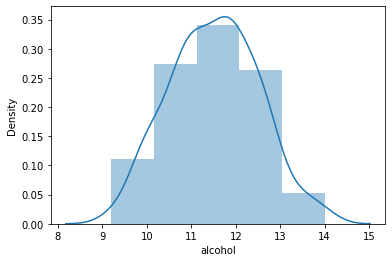



quality


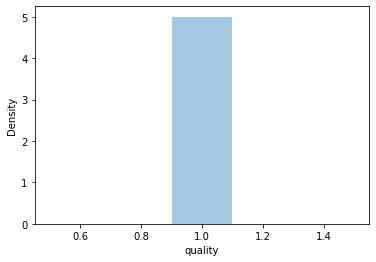

In [38]:
for col in g:
    print(col)
    plt.plot()
    sns.distplot(g[col],bins=5)
    plt.show()
    print('\n')

Observations:
    
    1.If we compare the good quality wine distplot with overall data set we can see that there are lot of skewness in roiginal dataset.

# Multivariate Analysis

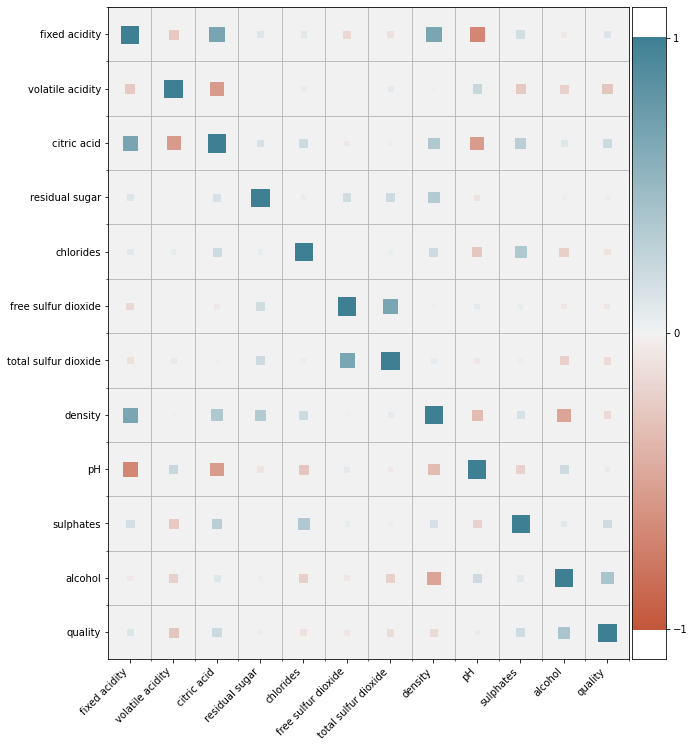

In [40]:
plt.figure(figsize=(10,12))
corrplot(df.corr(),size_scale=300)
plt.show()

Observations:
    
       Lets list out the significant relationship between various variables and and lets analyse them in bivariate analysis,
        1.citric acid vs fixed acidity and volatile acidity,
        2.total sulphur dioxide vs free sulphur dioxide
        3.density vs fixed acidity,citric acid, residual sugar
        4.pH vs citric acid, chlorides,density
        5.sulphates vs chlorides
        6.alcohol vs density

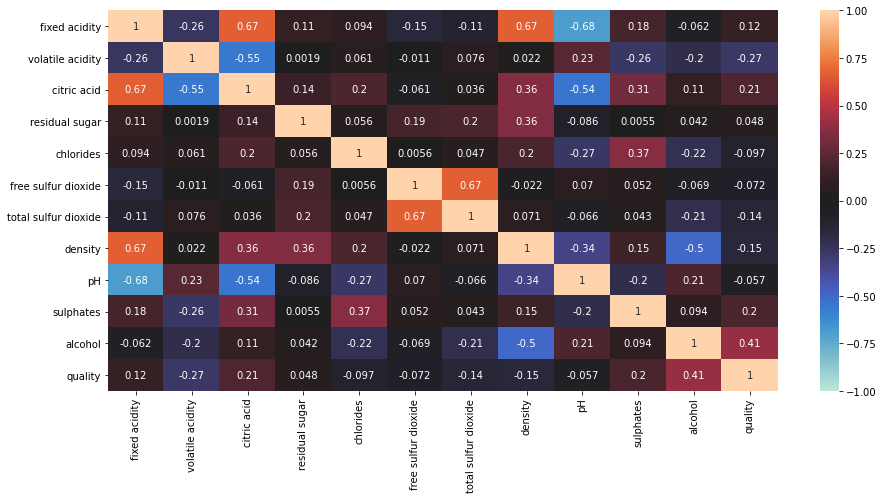

In [41]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:
    
    lets list out the close variables to our target variable 'quality',
    1.quality vs volatile acidity
    2.quality vs citric acid
    3.quality vs density
    4.quality vs sulphates
    5.quality vs alcohol
    

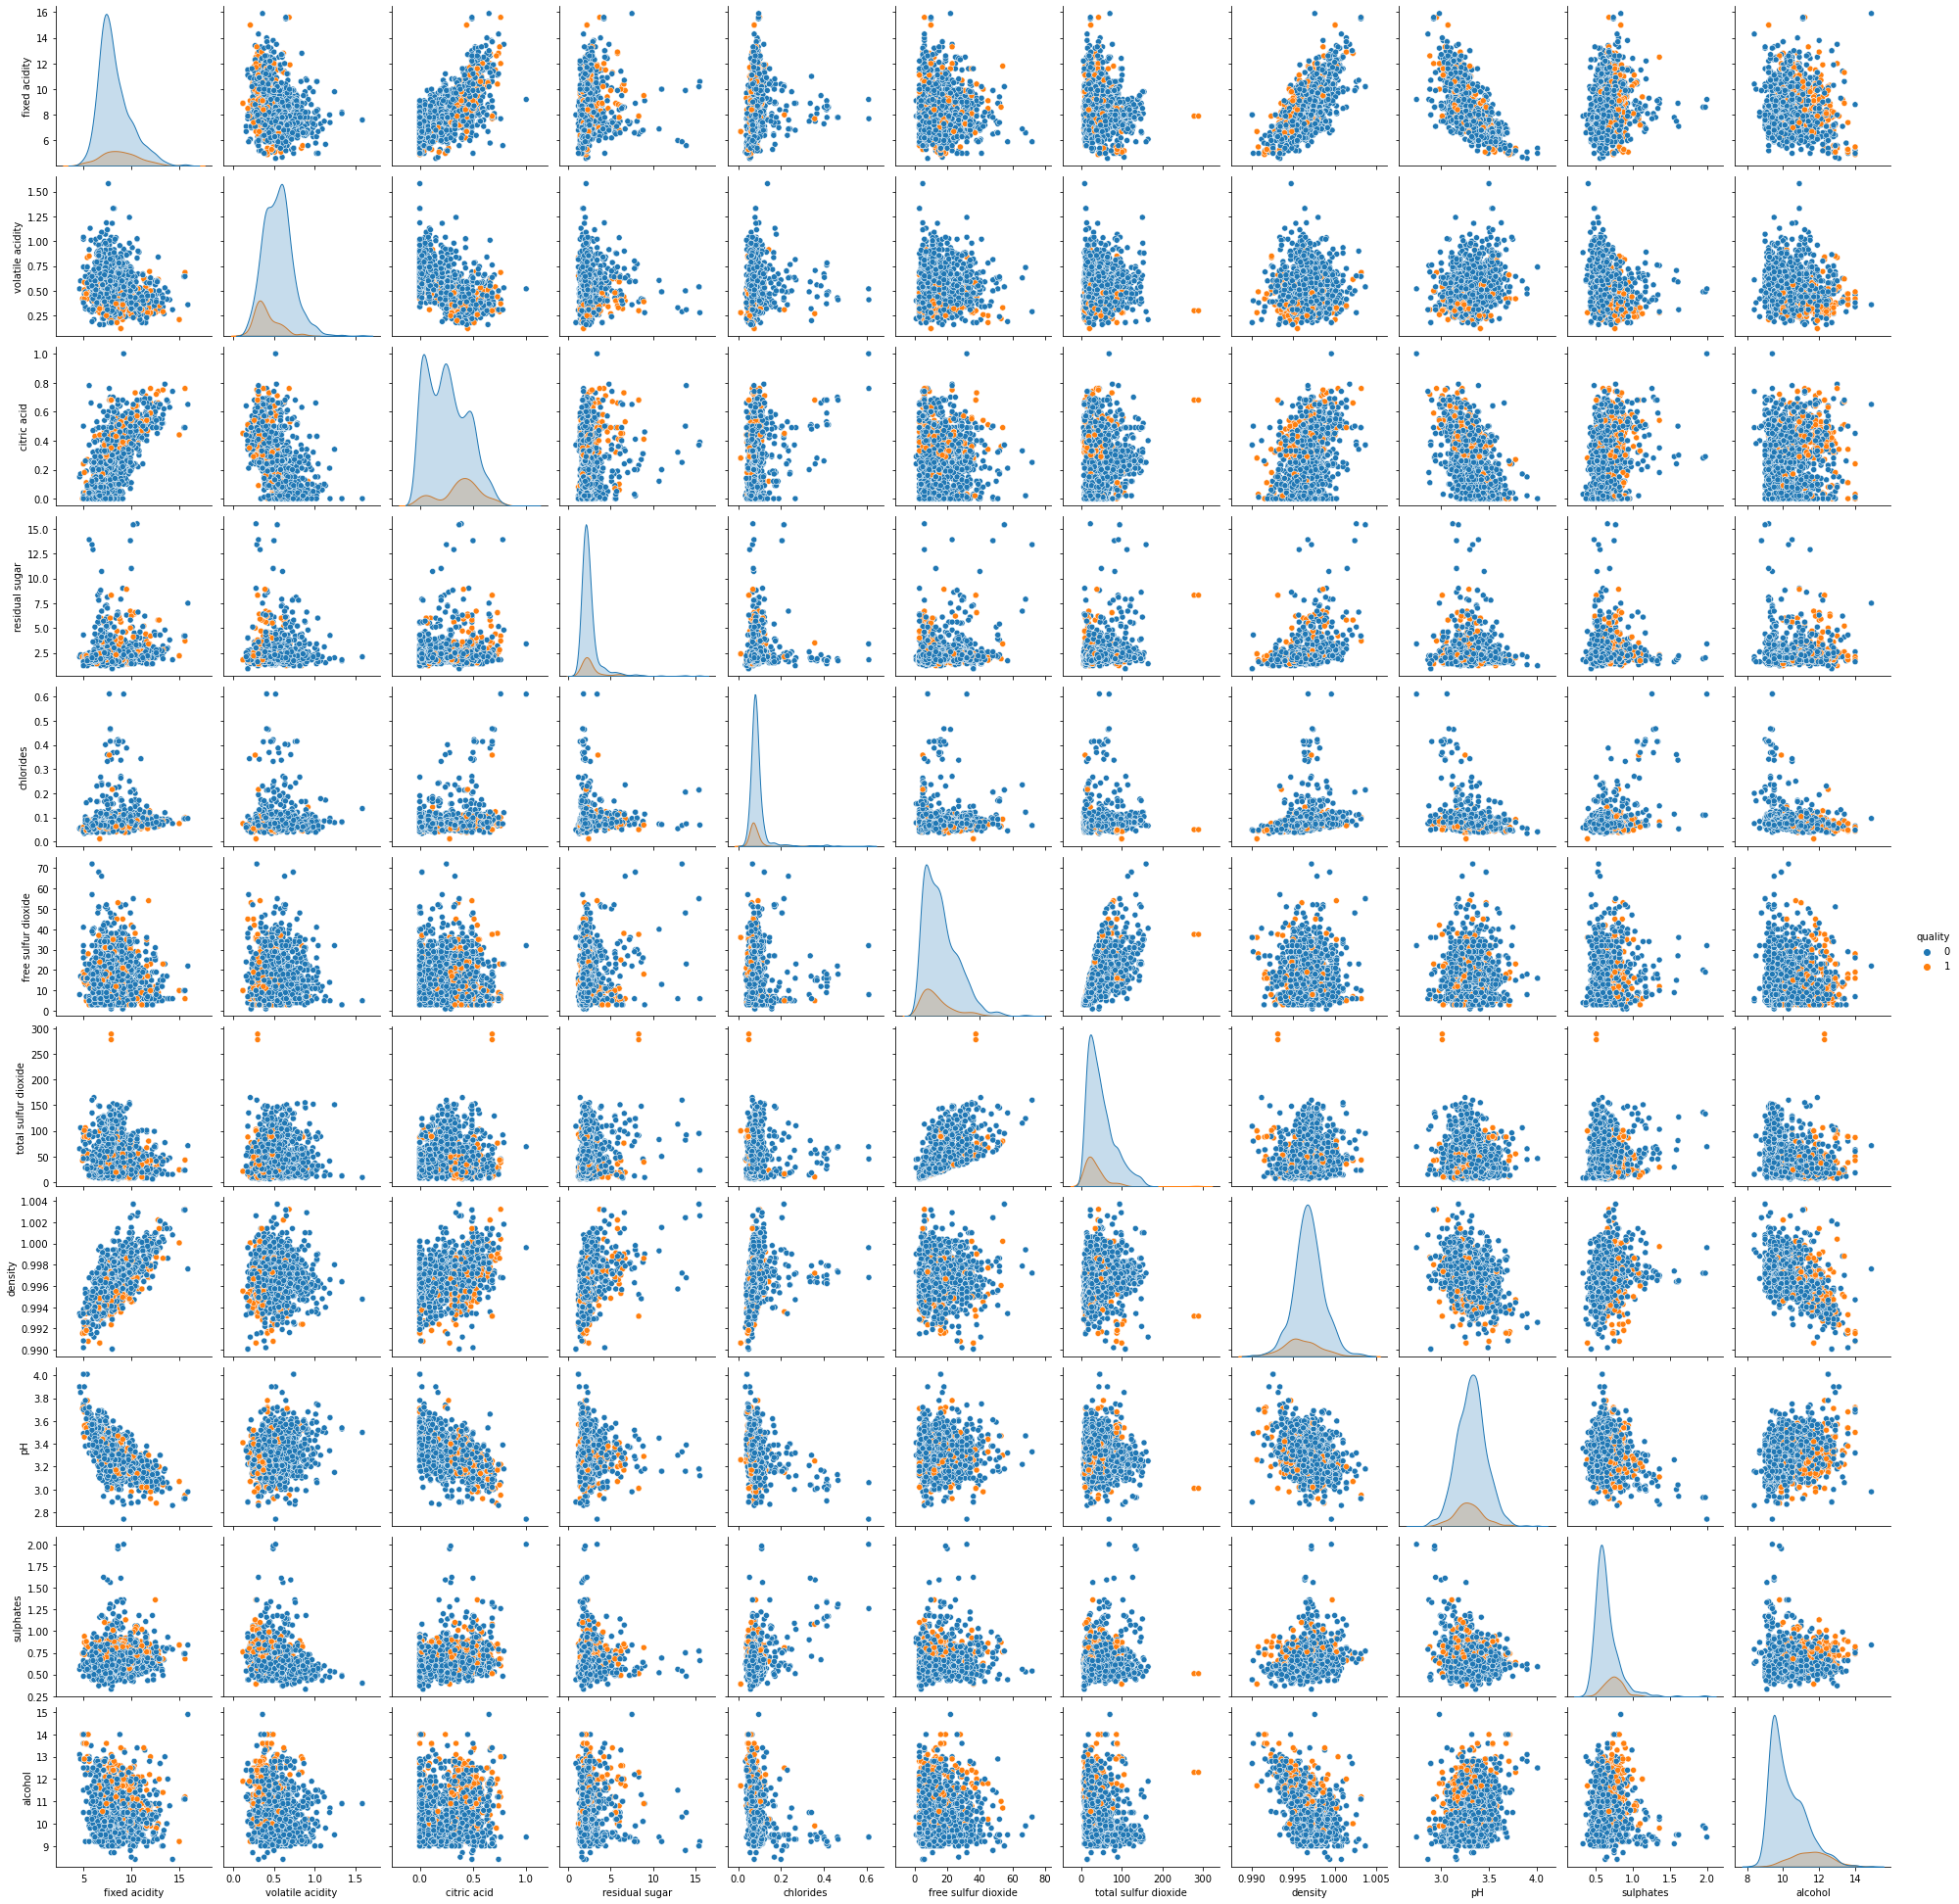

In [43]:
sns.pairplot(df,hue='quality')

Observations:
    
    1.There is not much significant patter apart from listed in above observations,

# Bi Variate Analysis

Lets analyse the target variable quality

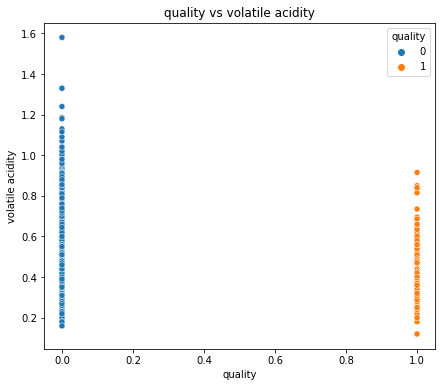

In [46]:
plt.figure(figsize=(7,6))
plt.title('quality vs volatile acidity')
sns.scatterplot(df['quality'],df['volatile acidity'],hue=df['quality'])
plt.show()

Observations:
    
    1.The value of volatile acidity value wont go higher than 1 for good class wine.

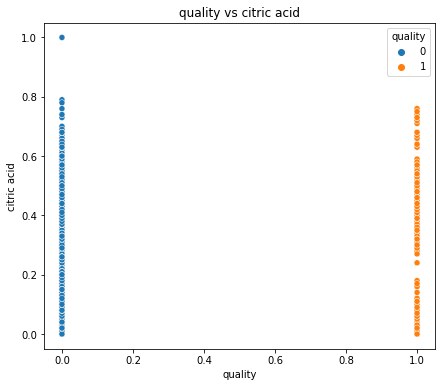

In [47]:
plt.figure(figsize=(7,6))
plt.title('quality vs citric acid')
sns.scatterplot(df['quality'],df['citric acid'],hue=df['quality'])
plt.show()

Observations:
    
    1.For producing good wine dont keep the value of 0.8.

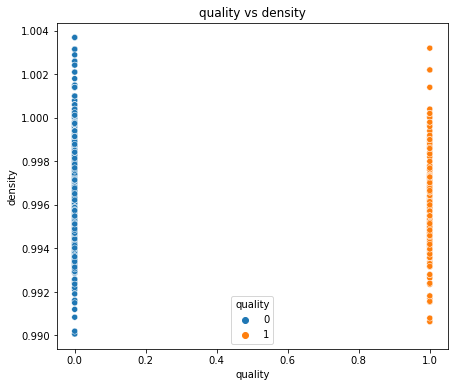

In [48]:
plt.figure(figsize=(7,6))
plt.title('quality vs density')
sns.scatterplot(df['quality'],df['density'],hue=df['quality'])
plt.show()

Observations:
    
    1.No significant observations,

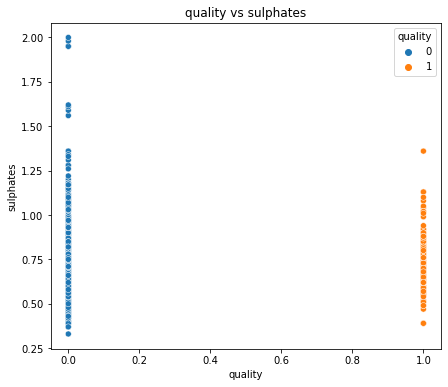

In [49]:
plt.figure(figsize=(7,6))
plt.title('quality vs sulphates')
sns.scatterplot(df['quality'],df['sulphates'],hue=df['quality'])
plt.show()

Observations:
    
    1.To produce good wine keep the sulphates value less than 1.15

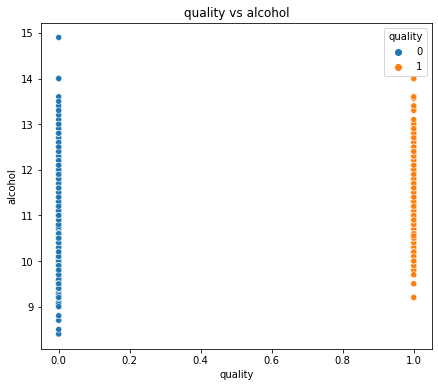

In [50]:
plt.figure(figsize=(7,6))
plt.title('quality vs alcohol')
sns.scatterplot(df['quality'],df['alcohol'],hue=df['quality'])
plt.show()

Observations:
    
    1.Dont keep the value of alcohol less than 9 for producing good quality wine.

fixed acidity


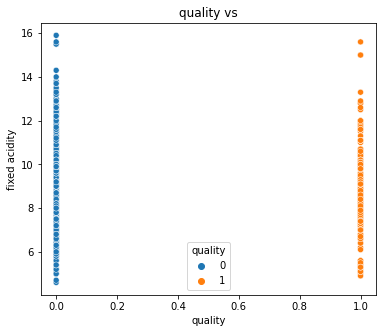

volatile acidity


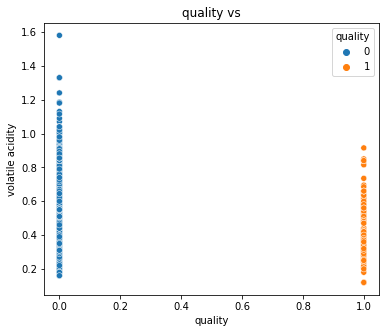

citric acid


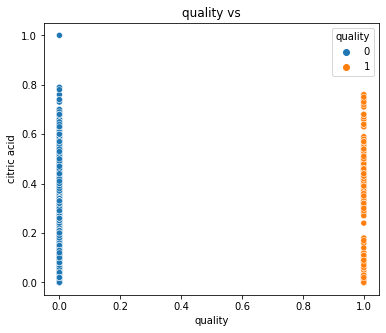

residual sugar


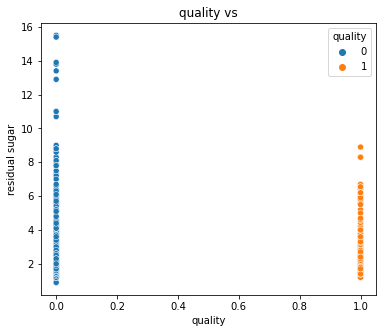

chlorides


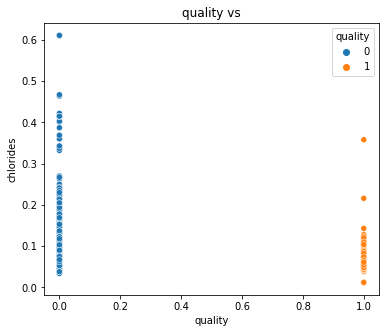

free sulfur dioxide


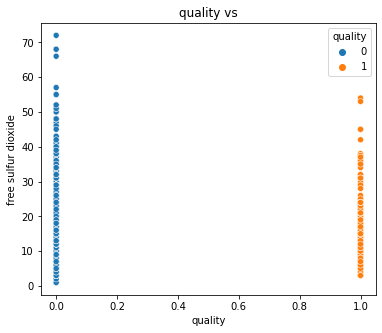

total sulfur dioxide


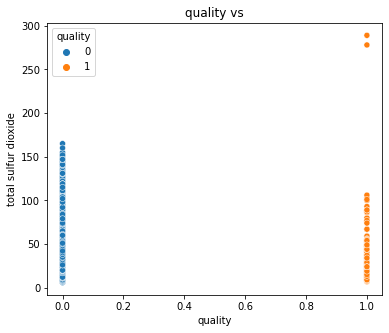

density


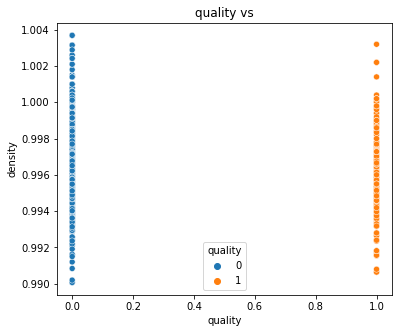

pH


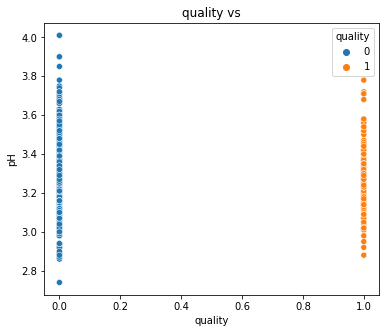

sulphates


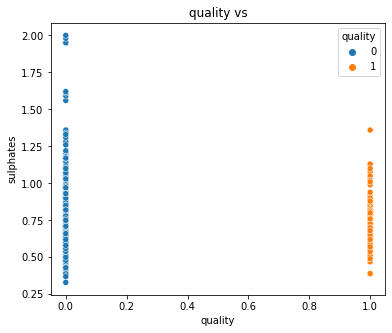

alcohol


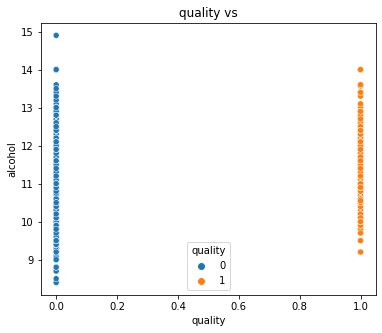

quality


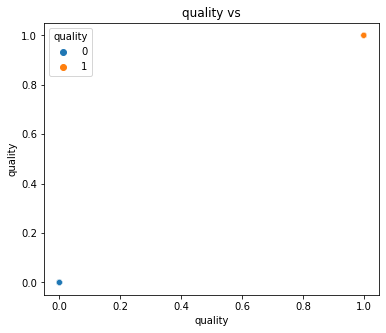

In [53]:
for col in df:
    plt.figure(figsize=(6,5))
    plt.title('quality vs')
    print(col)
    sns.scatterplot(df['quality'],df[col],hue=df['quality'])
    plt.show()
    

Observations:
    
    1.Dont keep the value of residual sugar more than 9 for producing good  wine.
    2.Keep the value of chlorides less than 0.2 to produce good quality wine.
    3.keep the value of free sulphur dioxide less than 40 to produce good wine.
    4.Keep the value of total sulphur dioxide less than 120 for producing good wine.  

# Valuable infromation for producing good quality wines through EDA

Qualities of good wine:
    
    

        1.The value of volatile acidity value wont go higher than 1 for good class wine.
        2.For producing good wine dont keep the value of citric acid value more than 0.8.
        3.To produce good wine keep the sulphates value less than 1.15
        4.Dont keep the value of alcohol less than 9 for producing good quality wine.
        5.Dont keep the value of residual sugar more than 9 for producing good  wine.
        6.Keep the value of chlorides less than 0.2 to produce good quality wine.
        7.keep the value of free sulphur dioxide less than 40 to produce good wine.
        8.Keep the value of total sulphur dioxide less than 120 for producing good wine.

        #keep the values in following range for producing high rated wines
        1.The fixed acidity value should be in the range of 8.56 to 10.22
        2.volatile acidity value should be in the range of 0.42 to 0.85
        3.citric acid value should be in the range of 0.39 to 0.53
        4.residual sugar value should be in 2.57 to 2.6
        5.chlorides value should be in the range of 0.06 to 0.075
        6.free sulphur dioxide should be in the range of 13.27 to 16.5
        7.total sulphur dioxide should be in the range of 33.44 to 43
        8.density should be in the range of 0.995 to 0.998
        9.PH should be in the range of 3.26 to 3.72
        10.sulphates should be in range of 0.76 to 9.82
        11.alcohol should be in the range of 12.09 to 12.87

# Data Cleaning

In [54]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [57]:
k=df.applymap(np.isreal)
k.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True


In [59]:
for col in k:
    print(col)
    print(k[col].value_counts())
    print('\n')

fixed acidity
True    1599
Name: fixed acidity, dtype: int64


volatile acidity
True    1599
Name: volatile acidity, dtype: int64


citric acid
True    1599
Name: citric acid, dtype: int64


residual sugar
True    1599
Name: residual sugar, dtype: int64


chlorides
True    1599
Name: chlorides, dtype: int64


free sulfur dioxide
True    1599
Name: free sulfur dioxide, dtype: int64


total sulfur dioxide
True    1599
Name: total sulfur dioxide, dtype: int64


density
True    1599
Name: density, dtype: int64


pH
True    1599
Name: pH, dtype: int64


sulphates
True    1599
Name: sulphates, dtype: int64


alcohol
True    1599
Name: alcohol, dtype: int64


quality
True    1599
Name: quality, dtype: int64




Observations:
    
    1.No false value in any column so data is cleaned.

# Removing the Outlier

# Removing the outlier by Zscore method

In [61]:
z=np.abs(zscore(df))
threshold=3
dfz=df[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df.shape[0]-dfz.shape[0])/df.shape[0])

percentage of loss of data by zscore is : 0.08818011257035648


# Removing the Outliers by IQR method

In [63]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
dfiq=df[~((df <(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]
print('percentage of loss of data by IQR is :',(df.shape[0]-dfiq.shape[0])/df.shape[0])

percentage of loss of data by IQR is : 0.3452157598499062


Observations:
    
    1.Adapting the zscore method for removing the outliers,

In [64]:
dfz.shape

(1458, 12)

In [66]:
dfz.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# Splitting the target variable

In [67]:
x=dfz.drop('quality',axis=1)
y=dfz['quality']

In [68]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [69]:
x.shape

(1458, 11)

In [70]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [71]:
y.shape

(1458,)

# Removing the skewness

In [72]:
x.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
dtype: float64

Observations:
    
    1.There are columns which has got significant skewness

In [73]:
#lets find the best method for skewness
from scipy.stats import skew
def skee(a):
    model=[np.sqrt(a),np.log(a),stats.boxcox(a)[0]]
    print('original skewness is:',a.skew())
    print('\n')
    for m in model:
        x=m
        print(skew(m))
        print('\n')

In [75]:
skee(x['fixed acidity'])

original skewness is: 0.8208794217024747


0.6010891324594902


0.3767118463943865


0.01532093348465539




In [77]:
from scipy.stats import boxcox
x['fixed acidity']=stats.boxcox(x['fixed acidity'])[0]

In [78]:
skee(x['volatile acidity'])

original skewness is: 0.39209653586394205


-0.034832128870864856


-0.509074583834479


-0.016875361569027577




In [79]:
x['volatile acidity']=stats.boxcox(x['volatile acidity'])[0]

In [80]:
skee(x['residual sugar'])

original skewness is: 2.4507068808274517


1.8321619167048824


1.2278053936707407


-0.030014345409455225




In [81]:
x['residual sugar']=stats.boxcox(x['residual sugar'])[0]

In [82]:
skee(x['chlorides'])

original skewness is: 2.307274011108756


1.341098017724956


0.528283868818099


-0.06125545192080551




In [83]:
x['chlorides']=stats.boxcox(x['chlorides'])[0]

In [84]:
skee(x['free sulfur dioxide'])

original skewness is: 0.8697269902004716


0.32135723576323316


-0.2999548036256322


-0.033062149012218364




In [85]:
x['free sulfur dioxide']=stats.boxcox(x['free sulfur dioxide'])[0]

In [86]:
skee(x['total sulfur dioxide'])

original skewness is: 1.1852299750598436


0.5570217543312305


-0.09563613700897614


-0.010245144309190888




In [87]:
x['total sulfur dioxide']=stats.boxcox(x['total sulfur dioxide'])[0]

In [88]:
skee(x['sulphates'])

original skewness is: 0.8932972989903312


0.6166434306508723


0.344988316853347


0.0033149212778736943




In [89]:
x['sulphates']=stats.boxcox(x['sulphates'])[0]

In [90]:
skee(x['alcohol'])

original skewness is: 0.7573956587951637


0.6710729739649768


0.588229147967485


0.10548956970024112




In [91]:
x['alcohol']=stats.boxcox(x['alcohol'])[0]

In [94]:
x.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [95]:
x.skew()

fixed acidity           0.015337
volatile acidity       -0.016893
citric acid             0.292600
residual sugar         -0.030045
chlorides              -0.061319
free sulfur dioxide    -0.033096
total sulfur dioxide   -0.010256
density                 0.055543
pH                      0.113039
sulphates               0.003318
alcohol                 0.105598
dtype: float64

Observations:
    
    1.All the skewness are in range,seems everything is fine.

# Dealing with class imbalance

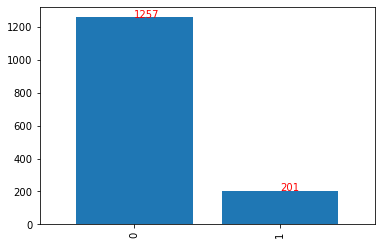

In [97]:
s = dfz['quality'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.quality + 0.2 , v.quality, color='red')

Observations:
    
    1clearly there is a class imbalance.

# Oversampling Technique

In [101]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

# Smote Technique

In [102]:
x_smote,y_smote=SM.fit_sample(x,y)

In [103]:
#Lets check which is better

In [120]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()

In [110]:
#finding the best random state

In [111]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=i)
    mod=svc
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.9166666666666666 on random state 133


In [121]:
print('Oversampling accuracy score for different models')
models=[lg,gnb,svc,dtc,knn,add,rf]
for m in models:
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.24,random_state=133)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score of',m)
    print(round((accuracy_score(y_test,pred)),3))
    print('\n')

Oversampling accuracy score for different models
accuracy score of LogisticRegression()
0.79


accuracy score of GaussianNB()
0.8


accuracy score of SVC()
0.772


accuracy score of DecisionTreeClassifier()
0.897


accuracy score of KNeighborsClassifier()
0.894


accuracy score of AdaBoostClassifier()
0.866


accuracy score of RandomForestClassifier()
0.942




In [122]:
print('SMOTE accuracy score for different models')
models=[lg,gnb,svc,dtc,knn,add,rf]
for m in models:
    x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.24,random_state=133)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score of',m)
    print(round((accuracy_score(y_test,pred)),3))
    print('\n')

SMOTE accuracy score for different models
accuracy score of LogisticRegression()
0.778


accuracy score of GaussianNB()
0.8


accuracy score of SVC()
0.773


accuracy score of DecisionTreeClassifier()
0.896


accuracy score of KNeighborsClassifier()
0.892


accuracy score of AdaBoostClassifier()
0.863


accuracy score of RandomForestClassifier()
0.942




In [123]:
models=[lg,gnb,svc,dtc,knn,add,rf]
for m in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.24,random_state=133)
    
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score of',m)
    print(round((accuracy_score(y_test,pred)),3))
    print('\n')

accuracy score of LogisticRegression()
0.926


accuracy score of GaussianNB()
0.886


accuracy score of SVC()
0.917


accuracy score of DecisionTreeClassifier()
0.883


accuracy score of KNeighborsClassifier()
0.917


accuracy score of AdaBoostClassifier()
0.923


accuracy score of RandomForestClassifier()
0.943




Observations:
    
    1.The highest accuracy we got is 0.943 through x ,so i will choose to go with x and y for further analysis.

# Building the Model

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.24,random_state=133)

In [125]:
print('x_train shape is :',x_train.shape)
print('\n')
print('x_test shape is :',x_test.shape)
print('\n')
print('y_train shape is :',y_train.shape)
print('\n')
print('y_test shape is :',y_test.shape)

x_train shape is : (1108, 11)


x_test shape is : (350, 11)


y_train shape is : (1108,)


y_test shape is : (350,)


In [126]:
models=[lg,gnb,svc,dtc,knn,add,rf]
for m in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.24,random_state=133)
    
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score of',m)
    print(round((accuracy_score(y_test,pred)),3))
    print('\n')

accuracy score of LogisticRegression()
0.926


accuracy score of GaussianNB()
0.886


accuracy score of SVC()
0.917


accuracy score of DecisionTreeClassifier()
0.891


accuracy score of KNeighborsClassifier()
0.917


accuracy score of AdaBoostClassifier()
0.923


accuracy score of RandomForestClassifier()
0.943




Observations:
    
    1.We have got highest accuracy for random forest.

# Checking for the cross validation score

In [127]:
models=[lg,gnb,svc,dtc,knn,add,rf]
for m in models:
    
    score=cross_val_score(m,x,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')


LogisticRegression() score is:
0.864


GaussianNB() score is:
0.836


SVC() score is:
0.862


DecisionTreeClassifier() score is:
0.816


KNeighborsClassifier() score is:
0.844


AdaBoostClassifier() score is:
0.858


RandomForestClassifier() score is:
0.874




In [128]:
models=[lg,gnb,svc,dtc,knn,add,rf]
for m in models:
    
    score=cross_val_score(m,x_smote,y_smote,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LogisticRegression() score is:
0.785


GaussianNB() score is:
0.796


SVC() score is:
0.779


DecisionTreeClassifier() score is:
0.859


KNeighborsClassifier() score is:
0.855


AdaBoostClassifier() score is:
0.844


RandomForestClassifier() score is:
0.911




In [129]:
models=[lg,gnb,svc,dtc,knn,add,rf]
for m in models:
    
    score=cross_val_score(m,x_over,y_over,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LogisticRegression() score is:
0.784


GaussianNB() score is:
0.787


SVC() score is:
0.778


DecisionTreeClassifier() score is:
0.87


KNeighborsClassifier() score is:
0.856


AdaBoostClassifier() score is:
0.85


RandomForestClassifier() score is:
0.911




Observations:
    
    lets find the difference between accuracy score and cross val score
    1. models based on x,y
        1.Logistic Regression:0.062 
        2.GNB                :0.05
        3.SVC                :0.055
        4.DTC                :0.075
        5.KNN                :0.073
        6.Add                :0.065
        7.RF                 :0.069
            
            
    2. models based on x_over,y_over
        1.Logistic Regression:0.006 
        2.GNB                :0.013
        3.SVC                :0.006
        4.DTC                :0.027
        5.KNN                :0.038
        6.Add                :0.016
        7.RF                 :0.031
            
    3. models based on x_smote,y_smote
        1.Logistic Regression:0.007 
        2.GNB                :0.004
        3.SVC                :0.006
        4.DTC                :0.037
        5.KNN                :0.037
        6.Add                :0.019
        7.RF                 :0.031

Observations:
    
    I will go for best model as x and y with Random forest.

In [130]:
#The best model is

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.24,random_state=133)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score through knn is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through knn is 
0.943
classification report is
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       321
           1       0.71      0.52      0.60        29

    accuracy                           0.94       350
   macro avg       0.84      0.75      0.78       350
weighted avg       0.94      0.94      0.94       350

confusion matrix is
[[315   6]
 [ 14  15]]




Observations:
    
    This is the best model we got through all the analysis.

# Hyper Parameter Tunning

In [133]:
grid_param={
    
    'max_features':['auto', 'sqrt'],
    'min_samples_split' :[2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'bootstrap' :[True, False],
    'criterion':['gini','entropy']
}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
0.8785858871157558


In [134]:
rf1=RandomForestClassifier(n_estimators=100,criterion='gini',max_features='sqrt',min_samples_split=10,min_samples_leaf=4,bootstrap=True)

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.24,random_state=133)
rf1.fit(x_train,y_train)
pred=rf1.predict(x_test)
print('accuracy score through knn is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through knn is 
0.934
classification report is
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       321
           1       0.67      0.41      0.51        29

    accuracy                           0.93       350
   macro avg       0.81      0.70      0.74       350
weighted avg       0.93      0.93      0.93       350

confusion matrix is
[[315   6]
 [ 17  12]]




Observations:
    
    0.934 is the maximum accuracy what we have got.

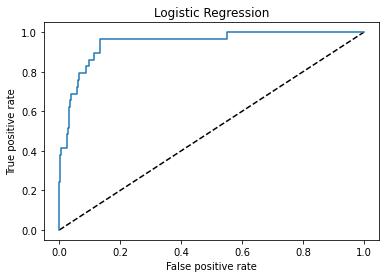

0.6975507573316145

In [136]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=rf1.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,rf1.predict(x_test))
auc_score

Observations:
    
    since the auc_score is more than 0.5 we can say that we can use rf1 model.

# Saving the model

In [141]:
import joblib
joblib.dump(rf1,'rfwine.obj')

['rfwine.obj']